Part-1

Simple practical application using Langchain which provides 3 sentences on the entered topic.LangChain is a framework that helps developers build applications using large language models by connecting prompts, models, memory, and external tools into structured workflows.

In [2]:
pip install langchain langchain-community transformers accelerate sentencepiece


In [3]:
import os
os.environ["GROQ_API_KEY"] = "Enter Your API"


In [6]:
pip install langchain_groq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 4.0 MB/s eta 0:00:00


In [11]:
from langchain_groq import ChatGroq
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.3
)

prompt = PromptTemplate.from_template(
    "Explain {topic} in exactly 3 bullet points for a beginner."
)

chain = prompt | llm | StrOutputParser()
topic=input("Enter a topic name:")
print(chain.invoke({"topic": topic}))


Enter a topic name:generative ai
Here are three bullet points explaining generative AI in simple terms for a beginner:

• **What is Generative AI?**: Generative AI is a type of artificial intelligence that can create new, original content such as images, music, videos, or text. It uses algorithms and machine learning to generate new data that is similar to existing data, but not identical. Think of it like a painter who can create a new painting based on the styles of other artists.

• **How Does it Work?**: Generative AI works by analyzing a large dataset of existing content, identifying patterns and relationships between different elements, and then using that information to create new content. This process is called "training" the AI model, and it allows the AI to learn and improve over time. The AI can then generate new content based on what it has learned, often with surprising and creative results.

• **Examples of Generative AI**: Generative AI has many practical applications, s

Performing simple data analysis on a kaggle dataset(Netflix vs TV Shows).It was analyzed by checking rows, columns, and missing values.
Basic exploratory analysis was performed to study content distribution such as Movies vs TV Shows, top countries, and release years.
Simple visualizations were created to understand trends and patterns in the dataset.

In [12]:
pip install kaggle


In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows


In [14]:
import pandas as pd

df = pd.read_csv(path + "/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Simple data analysis of the dataset

In [15]:
df.shape


(8807, 12)

In [16]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [18]:
df["type"].value_counts()


,count
type,
Movie,6131
TV Show,2676


In [19]:
df["country"].value_counts().head()


,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199


In [20]:
df["release_year"].value_counts().sort_index().tail(10)


,count
release_year,
2012,237
2013,288
2014,352
2015,560
2016,902
2017,1032
2018,1147
2019,1030
2020,953


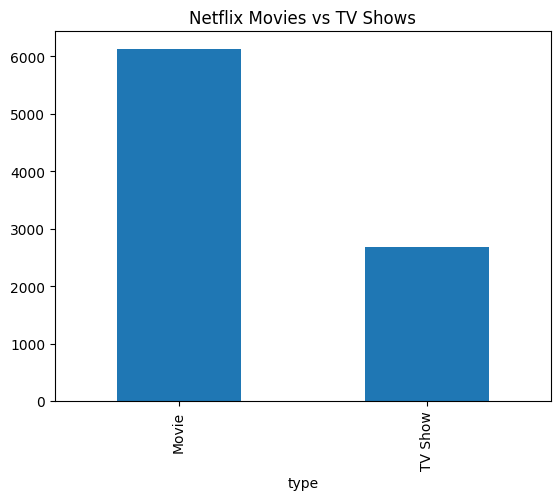

In [21]:
import matplotlib.pyplot as plt

df["type"].value_counts().plot(kind="bar")
plt.title("Netflix Movies vs TV Shows")
plt.show()


Part-2

A simple image classification task was performed using FastAI.
The MNIST sample dataset was loaded, a pretrained ResNet model was fine-tuned for one epoch, and predictions were generated on sample images.

In [22]:
pip install fastai


In [35]:
!pip -q install fastai fastprogress==1.0.3


In [33]:
from fastprogress.fastprogress import force_console_behavior
force_console_behavior()


(fastprogress.fastprogress.ConsoleMasterBar,
 fastprogress.fastprogress.ConsoleProgressBar)

In [1]:
!pip -q install fastai

from fastai.vision.all import *
from fastprogress.fastprogress import force_console_behavior

force_console_behavior()  # <-- fixes NBMasterBar 'out' error in Colab

path = untar_data(URLs.MNIST_SAMPLE)

dls = ImageDataLoaders.from_folder(
    path, train="train", valid="valid",
    item_tfms=Resize(28), bs=64
)

learn = vision_learner(dls, resnet18, metrics=accuracy)

learn.fit_one_cycle(1)

img = PILImage.create(get_image_files(path/"valid"/"3")[0])
print("Prediction:", learn.predict(img)[0])


epoch,train_loss,valid_loss,accuracy,time
0,0.173052,0.087007,0.967125,02:02


Prediction: 3


Using Hugging Face Transformers, basic NLP tasks were implemented such as sentiment analysis, translation, and text summarization.
Sentence embeddings were generated using a pretrained SentenceTransformer model to measure semantic similarity between sentences.

In [24]:
!pip -q install transformers sentence-transformers torch sentencepiece accelerate


In [25]:
from transformers import pipeline

sentiment = pipeline("sentiment-analysis")
print(sentiment("This project is amazing and super easy."))
print(sentiment("This is frustrating and confusing."))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.999876856803894}]
[{'label': 'NEGATIVE', 'score': 0.9994251728057861}]


In [26]:
from transformers import pipeline

translator = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")
print(translator("I am doing my NLP practical in Google Colab.")[0]["translation_text"])


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


Je fais mon NLP pratique dans Google Colab.


In [32]:
from transformers import pipeline

summarizer = pipeline("text2text-generation", model="google/flan-t5-base")
text="""Hugging Face is an open-source AI platform that provides tools, libraries, and pretrained models for building machine learning applications.
It is best known for the Transformers library, which makes it easy to use state-of-the-art models for tasks like sentiment analysis, translation, summarization, and text generation.
The Hugging Face Hub hosts thousands of public models and datasets that researchers and developers can reuse without training from scratch.
It also supports fine-tuning models for custom tasks and deploying them for real applications.
Because of this, Hugging Face is widely used in both industry and academia for NLP and other AI workflows."""
print(
    summarizer(
        "Summarize the following text by capturing only the main ideas:\n" + text,
        max_new_tokens=60,
        do_sample=False
    )[0]["generated_text"]
)


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu


Hugging Face is an open-source AI platform that provides tools, libraries, and pretrained models for building machine learning applications. It is best known for the Transformers library, which makes it easy to use state-of-the-art models for tasks like sentiment analysis, translation, summar
